### Hierarchical Clustering - Demographics

In [13]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [14]:
!ls *.pkl

acs_s.pkl  AgeSexRace.pkl  econ.pkl  housing.pkl  misc.pkl


In [16]:
acs_s = pd.read_pickle('acs_s.pkl')
acs_s.info()
acs_s.iloc[0:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Columns: 135 entries, town to p_spk_engl
dtypes: float64(130), object(5)
memory usage: 596.0+ KB


,town,county,state,FIPS,city_town,p_in_lab,p_unemployed,p_fem_labforce,p_fem_employed,p_ch6_paremp,...,p_civdis_18,p_civdis_1864,p_civdis_65,p_samehouse,p_diffhousUS,p_abroad1yr,p_nativeUS,p_nativestate,p_nat_citz,p_spk_engl
0,Absecon city,Atlantic County,New Jersey,3400100100,"Absecon city, Atlantic County, New Jersey",67.3,7.0,61.1,54.9,78.2,...,0.5,7.2,32.8,91.2,8.7,0.1,86.6,61.0,60.0,82.5
1,Atlantic City city,Atlantic County,New Jersey,3400102080,"Atlantic City city, Atlantic County, New Jersey",60.4,10.5,57.6,48.1,61.6,...,4.4,13.3,41.3,85.8,13.1,1.0,64.9,46.8,44.4,55.0
2,Brigantine city,Atlantic County,New Jersey,3400107810,"Brigantine city, Atlantic County, New Jersey",61.4,5.5,57.0,52.8,92.3,...,2.6,7.8,25.4,83.3,16.7,0.1,89.1,48.3,58.3,88.6
3,Buena borough,Atlantic County,New Jersey,3400108680,"Buena borough, Atlantic County, New Jersey",68.4,12.5,61.1,55.2,74.7,...,1.8,19.5,46.9,92.7,6.4,0.9,87.1,67.8,54.9,71.7
4,Buena Vista township,Atlantic County,New Jersey,3400108710,"Buena Vista township, Atlantic County, New Jersey",63.0,9.8,61.6,52.8,60.0,...,10.4,11.6,34.5,95.9,4.1,0.0,87.2,64.5,32.8,79.6


In [17]:
X = acs_s.iloc[:,5:]
#X=X.set_index(s['town'])
X.describe()

,p_in_lab,p_unemployed,p_fem_labforce,p_fem_employed,p_ch6_paremp,p_com_car,p_com_carpool,p_com_transit,p_com_walk,p_com_other,...,p_civdis_18,p_civdis_1864,p_civdis_65,p_samehouse,p_diffhousUS,p_abroad1yr,p_nativeUS,p_nativestate,p_nat_citz,p_spk_engl
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,...,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,65.858584,5.911150,60.035752,54.772035,65.719646,76.903186,7.493451,6.544779,2.656991,1.644425,...,3.489912,7.661239,31.935575,90.969735,8.538584,0.490088,83.931681,57.151504,60.569912,79.713097
std,7.424766,2.362525,8.349816,8.006272,15.619485,10.836566,3.671296,7.505480,3.442348,2.285940,...,2.565301,3.849183,9.274184,4.487862,4.333389,0.595260,12.588536,13.025039,18.821167,16.841970
min,22.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,34.100000,0.000000,0.000000,12.400000
25%,63.400000,4.400000,56.700000,51.500000,58.800000,73.100000,5.200000,1.700000,0.800000,0.500000,...,1.800000,4.800000,26.300000,88.800000,5.600000,0.000000,78.400000,49.700000,49.100000,71.700000
50%,67.400000,5.500000,61.500000,55.900000,66.900000,79.500000,7.000000,4.200000,1.600000,1.000000,...,3.000000,7.000000,31.400000,91.800000,7.800000,0.300000,88.000000,58.900000,61.500000,85.300000
75%,70.100000,7.000000,65.200000,59.500000,75.300000,84.000000,9.000000,9.000000,3.200000,2.000000,...,4.600000,9.700000,37.500000,94.200000,10.700000,0.700000,93.200000,66.500000,73.100000,91.900000
max,81.500000,17.500000,88.200000,88.200000,100.000000,100.000000,28.300000,55.100000,44.300000,24.100000,...,19.000000,31.100000,100.000000,100.000000,29.600000,4.800000,100.000000,100.000000,100.000000,100.000000


In [18]:
X.isnull().sum(axis=1).tolist()
#X.iloc[0:10]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [19]:
X_scaled = preprocessing.scale(X)

X_scaled[520:521,:]  


array([[ -2.8927 ,  -2.50426,  -3.76818,  -3.27184,  -4.21127,  -7.10293,
         -2.0429 ,  -0.87277,  -0.77254,  -0.72   ,  18.73738,  -5.16788,
          0.58689,  -2.41473,   5.41783,  -2.03132,  -1.71803,  -0.51818,
         -2.14024,  -2.43758,  -1.95482,  -3.24955,  -1.79673,  -1.75787,
         -1.9293 ,  -2.26129,  -4.62552,  -1.62669,  -2.18404,  18.88919,
        -12.41851,  13.74099,  -2.02156,  -0.44357,  -1.24999,  -1.34854,
         14.09868,   6.226  ,  -2.56042,  -3.49265,  -3.51826,  -3.31898,
         -2.03025,  -1.00598,  -2.22539,  -1.90385,  -1.23133,   1.45607,
         -0.8606 ,  -0.7598 ,  -0.35096,  -0.54637,   2.29676,  -0.61028,
          4.01327,  -1.22495,   1.20391,   0.85712,   2.82627,  -1.24645,
         -0.72105,  -1.37909,  -0.36818,   1.476  ,  -4.40968,  -4.5494 ,
          6.37908,  -1.01817,   3.90368,  -1.28632,  -2.35086,   0.69798,
         -0.95173,  -0.41423,  -1.02311,  -6.4775 ,  -3.05277,  -1.57088,
         -7.56282,  -2.77245,  -3.1827

In [20]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for m in methods:
    Z = linkage(X_scaled, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print(m,": ", c)

#    c, coph_dists = cophenet(Z, pdist(X))
#c
#coph_dists
#c

single :  0.172613844016
complete :  0.338403666546
average :  0.196022842214
weighted :  0.140788190793
centroid :  0.166006827909
median :  0.177344871434
ward :  0.185984348702


In [21]:
Z = linkage(X_scaled, 'ward')

In [22]:
Z[:10]

array([[ 419.     ,  444.     ,    3.464  ,    2.     ],
       [ 310.     ,  314.     ,    3.81532,    2.     ],
       [ 341.     ,  423.     ,    3.87831,    2.     ],
       [ 387.     ,  460.     ,    3.94058,    2.     ],
       [ 481.     ,  486.     ,    4.51811,    2.     ],
       [ 105.     ,  239.     ,    4.5346 ,    2.     ],
       [ 146.     ,  168.     ,    4.57897,    2.     ],
       [ 353.     ,  409.     ,    4.62288,    2.     ],
       [ 411.     ,  515.     ,    4.7567 ,    2.     ],
       [ 395.     ,  482.     ,    4.78875,    2.     ]])

In [23]:
Z[-10:]

array([[ 1105.     ,  1112.     ,    43.10584,   100.     ],
       [ 1102.     ,  1111.     ,    43.30699,   163.     ],
       [ 1101.     ,  1120.     ,    53.28378,   260.     ],
       [ 1097.     ,  1116.     ,    57.07595,    28.     ],
       [ 1117.     ,  1119.     ,    61.1555 ,   129.     ],
       [  520.     ,  1122.     ,    64.91639,    29.     ],
       [ 1115.     ,  1118.     ,    71.01312,   147.     ],
       [ 1121.     ,  1124.     ,    79.77131,   289.     ],
       [ 1123.     ,  1126.     ,    87.62062,   418.     ],
       [ 1125.     ,  1127.     ,   131.55756,   565.     ]])

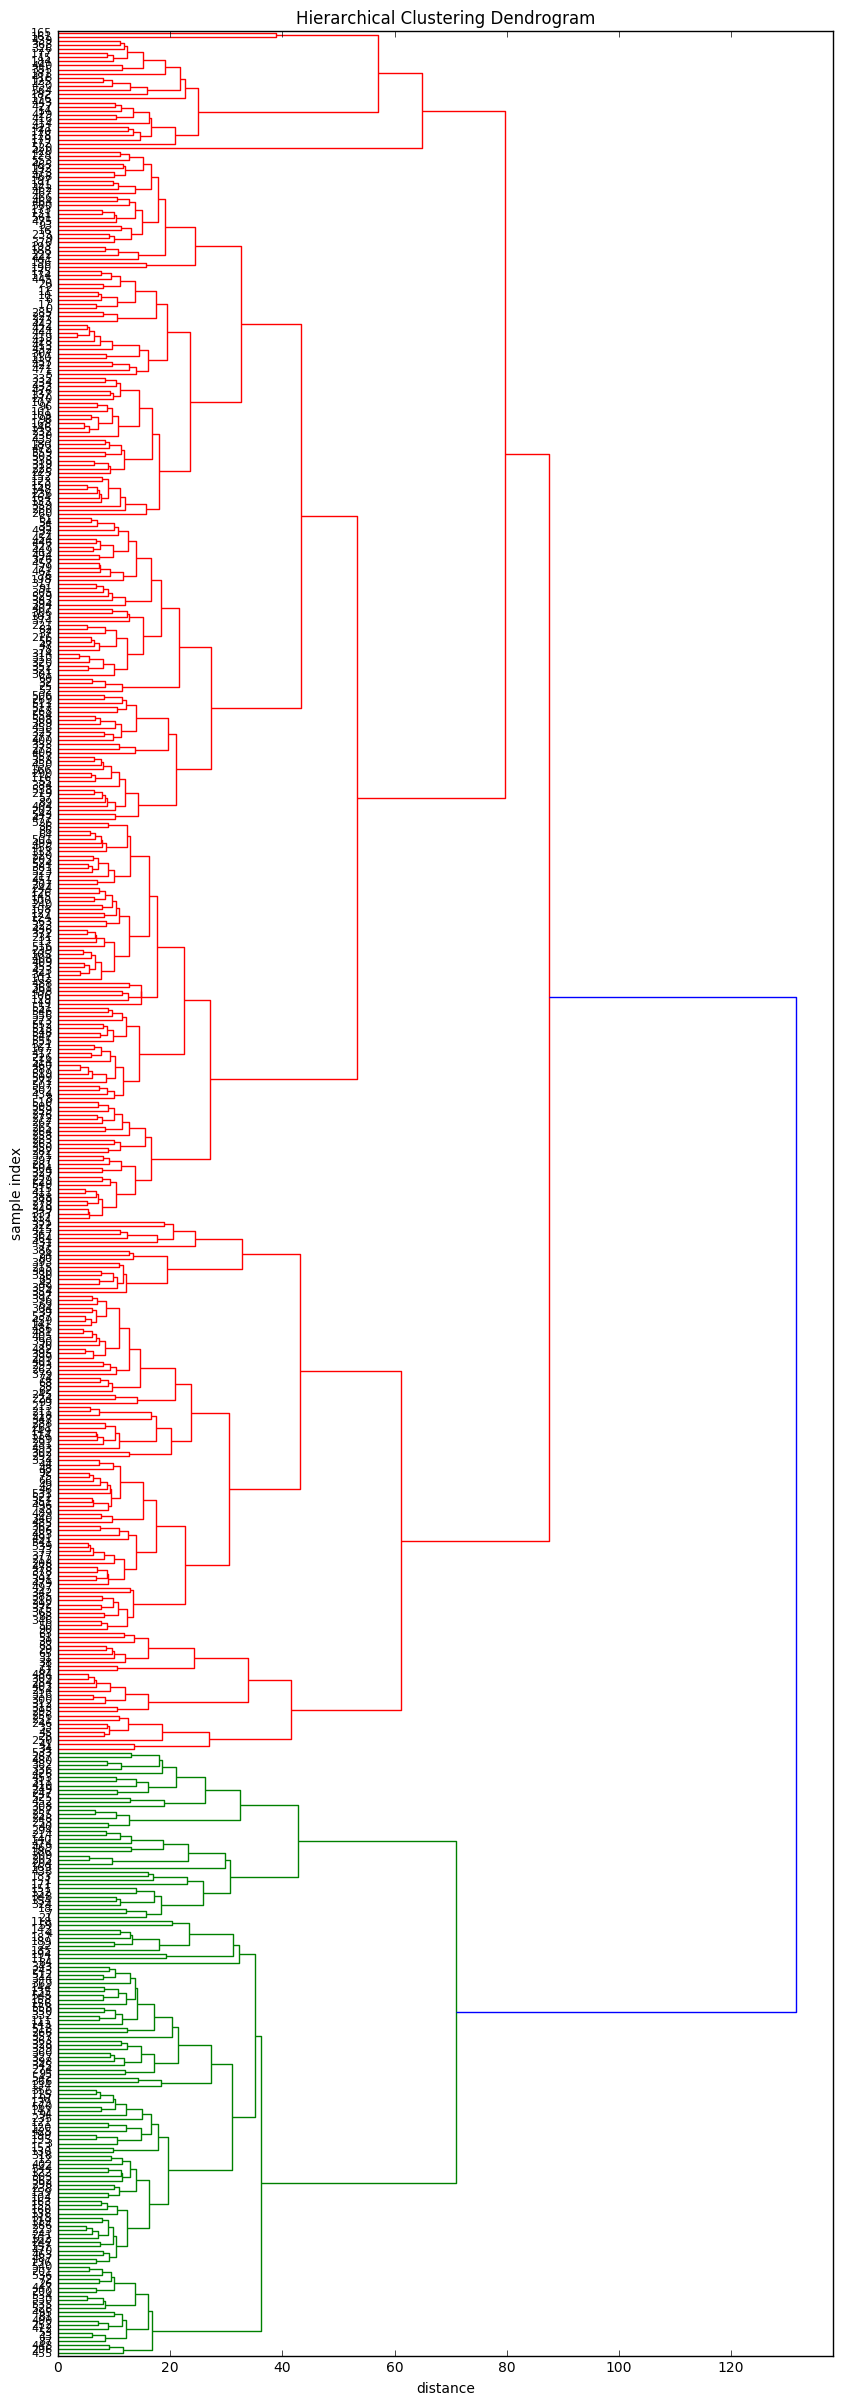

In [24]:
# calculate full dendrogram
plt.figure(figsize=(10, 30))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance')
dendrogram(
    Z,
    orientation='right',
#    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [25]:
Z[-10:,2]

array([  43.10584,   43.30699,   53.28378,   57.07595,   61.1555 ,
         64.91639,   71.01312,   79.77131,   87.62062,  131.55756])

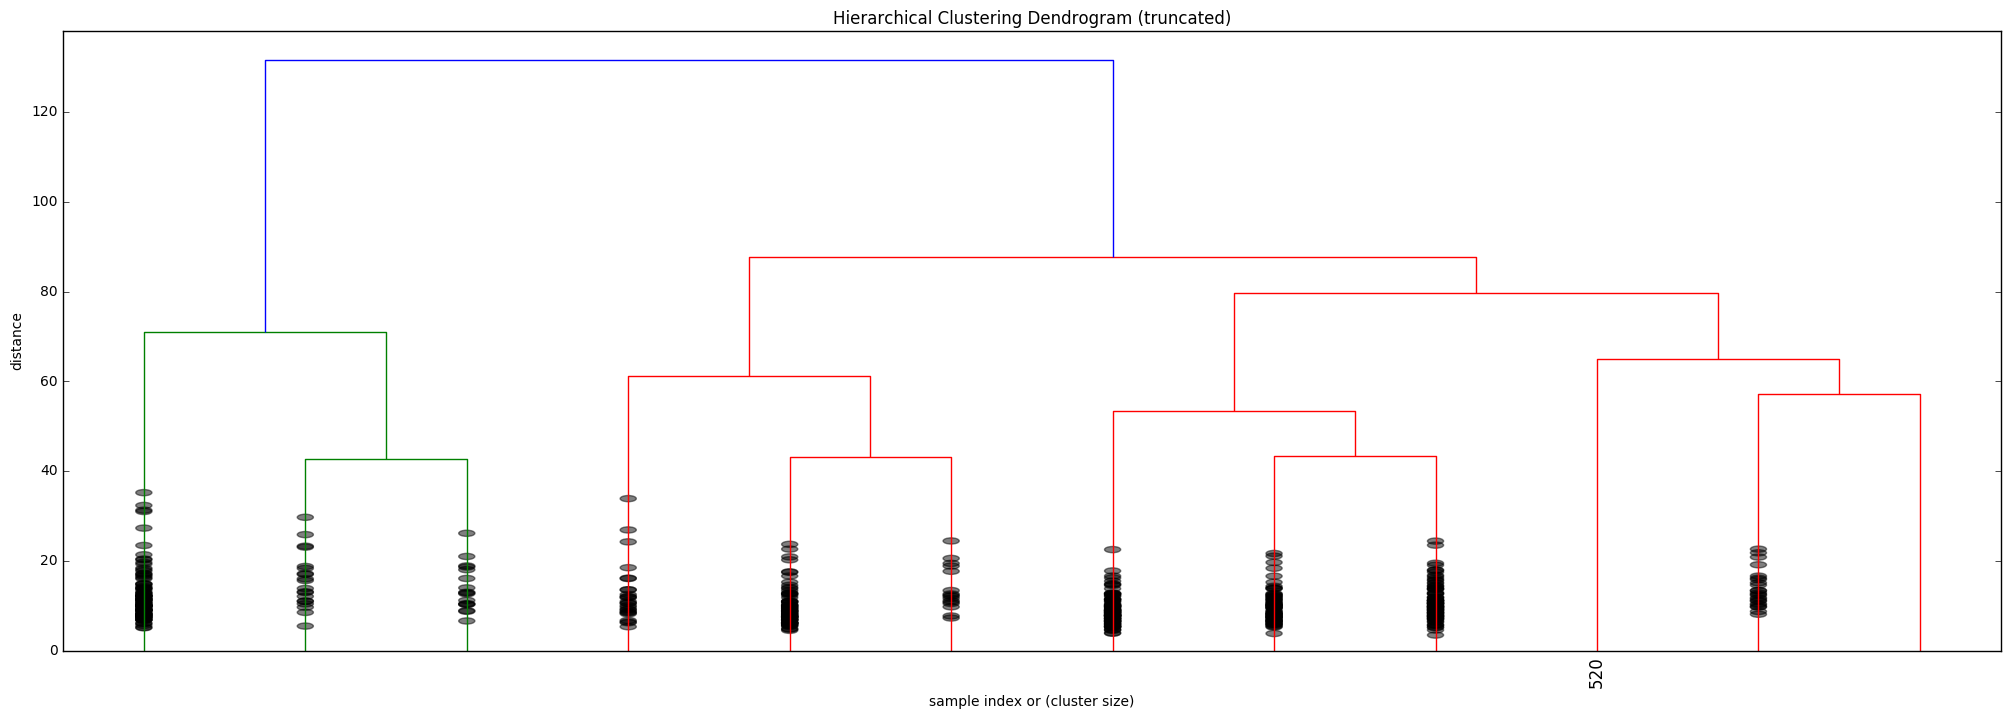

In [26]:
plt.figure(figsize=(25, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [27]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

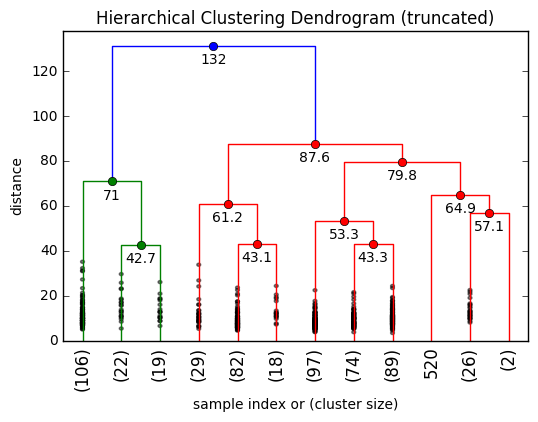

In [28]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

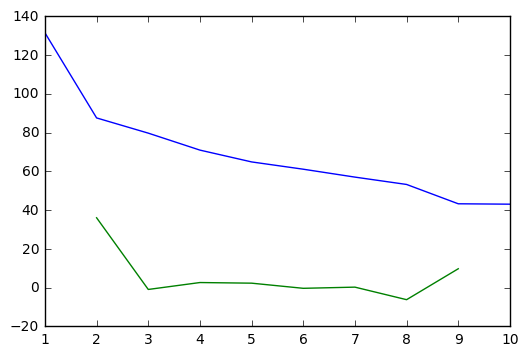

clusters: 2


In [29]:
## Elbow Method

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [31]:
from scipy.cluster.hierarchy import fcluster
max_d = 75
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 4, 4, 3, 3, 1, 3, 3, 1, 1,
       2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 3, 2, 1, 3, 2, 1, 2, 3, 1, 2, 3, 2, 3,
       2, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 4, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 3, 4, 3, 3, 3, 1, 4, 1, 4, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 1,
       4, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 2,
       3, 2, 1, 2, 2, 2, 2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 3, 1,
       2, 2,

In [ ]:
from collections import defaultdict
cluster_dict = defaultdict(list)
for i, c in enumerate(clusters):
    cluster_dict[c].append(i)
print(cluster_dict)